# Hierarchical Clustering Example

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs        # make some data to cluster
from scipy.spatial.distance import pdist       # pair-wise distances
from scipy.spatial.distance import squareform  # dist. vector to square dist. matrix
from scipy.cluster.hierarchy import linkage    # how to define distances between clusters
from scipy.cluster.hierarchy import dendrogram # display a dendrogram 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

## Make some data to cluster

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=25, 
                            n_features=2, 
                            centers=centers, 
                            cluster_std=0.8,
                            random_state=2)

labels = np.arange(0, len(X))  # datapoint numbers

print(X.shape)
print()
print(X[:5]) # first five rows

(25, 2)

[[ 1.48907262 -0.96162353]
 [-0.43474847  0.32660211]
 [-1.59829676 -0.9927798 ]
 [ 1.40148577 -1.67537096]
 [ 0.74919344 -0.38319061]]


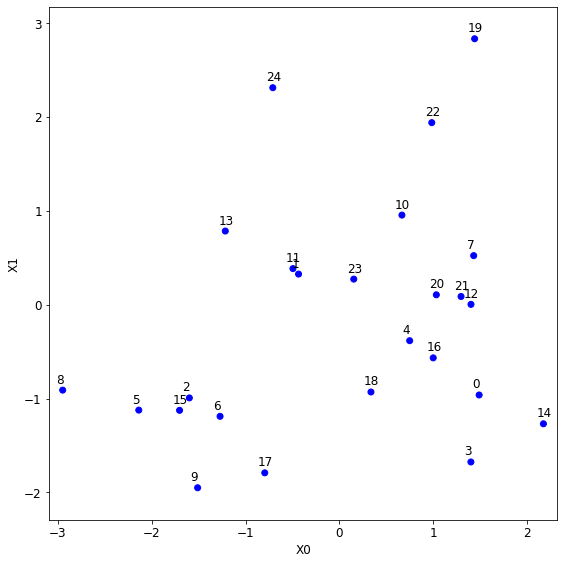

In [3]:
colors = np.full(len(X),'blue')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], color=colors)
for label, x0, x1 in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x0, x1), xytext=(-7, 7),
        textcoords='offset points')
ax.axis('equal')
ax.set_xlabel('X0')
ax.set_ylabel('X1')
fig.tight_layout()

## Get the pair-wise distances

In [4]:
# Set distance metric
# see scipy.spatial.distance.pdist for options
distmetric = 'euclidean' # 'euclidean','cityblock','cosine','hamming' are some options

# Set linkage method
# see scipy.cluster.hierarchy.linkage for options
linkmethod = 'complete' # 'single', 'complete', 'average' are some options 

# Where would you like the clusters set?  In units of the dissimilarity metric.
thresh = 3

# Find distances using pair-wise distances in the array, according to desired metric
#dist = squareform(pdist(X, metric = distmetric))  # old way, required squareform
dist = pdist(X, metric = distmetric) # new way
dist.shape

(300,)

## Cluster it

In [5]:
# Deltermine clusters based on distances and linkage method
clust = linkage(dist, method=linkmethod)
clust

array([[ 1.        , 11.        ,  0.08349356,  2.        ],
       [12.        , 21.        ,  0.13516957,  2.        ],
       [ 2.        , 15.        ,  0.16845364,  2.        ],
       [ 4.        , 16.        ,  0.31043559,  2.        ],
       [20.        , 26.        ,  0.38287979,  3.        ],
       [ 6.        , 27.        ,  0.43612061,  3.        ],
       [ 7.        , 29.        ,  0.5767576 ,  4.        ],
       [23.        , 25.        ,  0.65774313,  3.        ],
       [ 0.        ,  3.        ,  0.71910143,  2.        ],
       [ 9.        , 17.        ,  0.73285146,  2.        ],
       [18.        , 28.        ,  0.75648923,  3.        ],
       [ 5.        ,  8.        ,  0.83834439,  2.        ],
       [14.        , 33.        ,  0.87321715,  3.        ],
       [19.        , 22.        ,  1.00358326,  2.        ],
       [30.        , 34.        ,  1.13264743,  5.        ],
       [10.        , 31.        ,  1.20253278,  5.        ],
       [13.        , 32.

## Show the results in a dendrogram

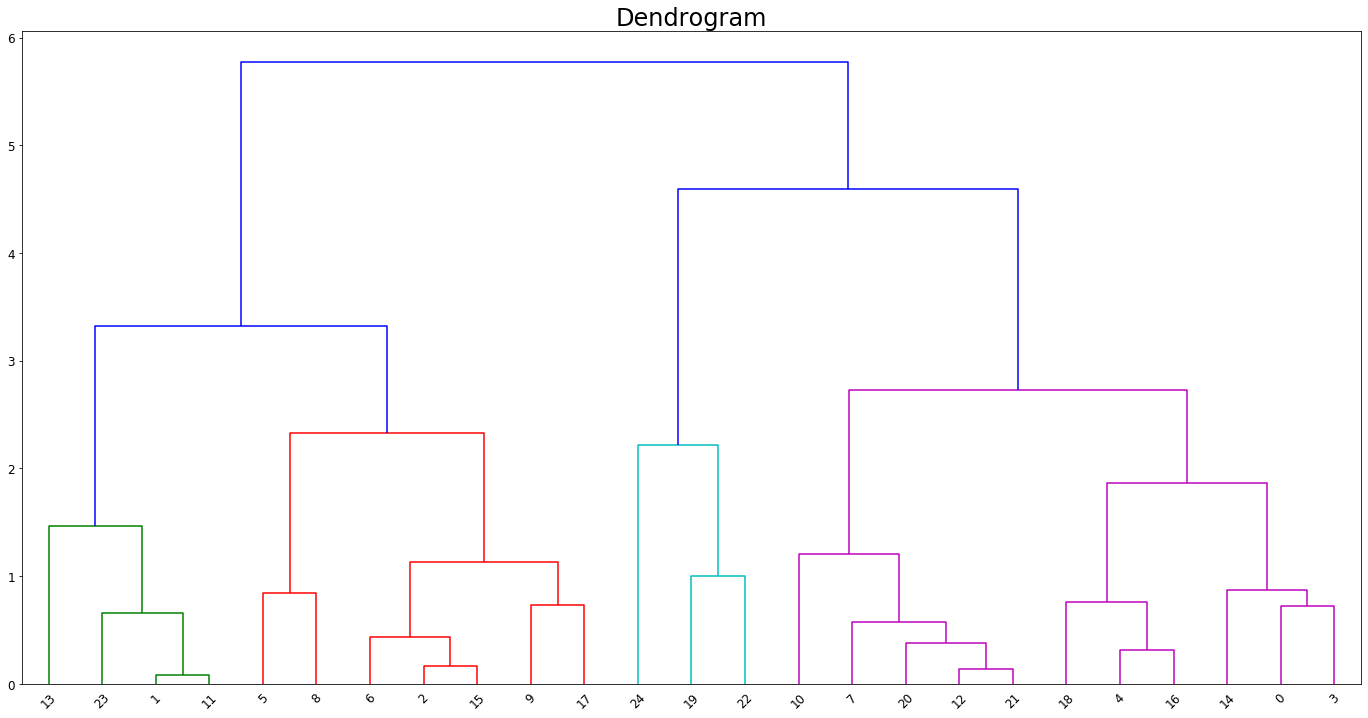

In [6]:
fig, ax = plt.subplots(figsize=(24, 12))
dendrogram(clust, ax=ax, labels=labels, color_threshold = thresh) #color threshold number sets the color change
plt.xticks(fontsize=12)
plt.title('Dendrogram', fontsize = 24);